## Assignment – Build a classifier for detecting Mines and Determine Influence of k in K‑Nearest Neighbours on the UCI Sonar Dataset

 There are two classes - mine "M" (positive class, label 1) and rock "R" (negative class, label 0)

**Learning goals**

-- Detect and reason about class imbalance.

-- Evaluate two -values (3 and 5) for K‑NN using proper cross‑validation.

-- Compare accuracy to class‑sensitive metrics (precision, recall, F1).

-- Practise writing result tables and interpreting trade‑offs.

-- (Extension) Experiment with a third classifier of your choice.

**Load dataset**
use the following command to convert the string labels into categorical
```
y = df['Label'].astype('category').cat.codes
```
**Part 1  Exploratory Check**

- Missing values  Report the count of NaN values in the raw CSV.

- Class balance: (a) Display a bar plot of R vs M counts.

(b) Compute the imbalance ratio (larger‑class ∕ smaller‑class).

(c) Decide whether the dataset is balanced or imbalanced (justify). This is upto your discretion.



**Part 2  Modelling**

- Perform 80 / 20 train‑test split (stratified if imbalanced).

- use StandardScaler → KNeighborsClassifier inside each fold.

- 5‑fold CV (use StratifiedKFold when imbalanced, plain KFold otherwise).

- Evaluate two models: Model  (a) KNN n_neighbors = 3 (b) KNN n_neighbors = 5

- For each model record:

i) Mean training accuracy (across folds)

ii) Mean validation accuracy

iii) Gap = train − val

- Test accuracy on the held‑out 20 % split

- Confusion matrix on the test set

- Precision, recall, F1  

Fill the required metrics into the table template below (extend it with the new columns for precision/recall/F1):

| k | Train Acc | Val Acc | Gap | Test Acc | Precision | Recall | F1 | Confusion Matrix | Best |
| :-: | :-------: | :-----: | :--: | :------: | :-------: | :----: | :---: | :--------------- | :--: |

Q1: State the best model whichever model you would deploy if the main goal is to minimise missed mines (maximise recall).

Make your judgement using the following reasong - If Based on your validation accuracy for k = 3 looked best, but the hold-out test shows k = 5 has higher balanced accuracy. Which would you deploy given that missing a mine carries greater risk than a false alarm?”

**Part 3  Interpretation Questions**

Q2: Class imbalance – How severe is it, and which metric (precision vs recall) carries more significance in a sonar mine‑hunting scenario?

Q3: k = 3 vs k=5 – Compare validation vs test results. Which k generalises better?

Q4:   Error profile – Using the confusion matrices, state whether false positives or false negatives dominate and discuss practical impact.

**Part 4  Extension (Open‑Ended)**

- Pick one additional classifier such as SVC:

- Evaluate it with the same pipeline and metrics (include precision/recall/F1).

- Add a new row to the results table.

- State whether it improves over KNN and why that might be.


Note: Precision, recall, F1 scores can be returned for both the classes. For the assignment we stick to the single-scalar version focused on mines. For precision, recall calculate with respect to the positive class denoted by class label 1. Note the variables denoting the test splits can change based on what you have used.

```
prec = precision_score(y_te, y_pred, pos_label=1)
rec  = recall_score(y_te, y_pred, pos_label=1)
f1   = f1_score(y_te, y_pred, pos_label=1)
```

## Part 1  Exploratory Check

- Missing values  Report the count of NaN values in the raw CSV.

- Class balance: (a) Display a bar plot of R vs M counts.

(b) Compute the imbalance ratio (larger‑class ∕ smaller‑class).

(c) Decide whether the dataset is balanced or imbalanced (justify). This is upto your discretion.



In [19]:
import pandas as pd
df = pd.read_csv("sonar.all-data.csv")
df

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [20]:
print("Missing values per column:")
print(df.isnull().sum())
print("All NaN Values:", df.isna().sum().sum()) 

Missing values per column:
Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64
All NaN Values: 0


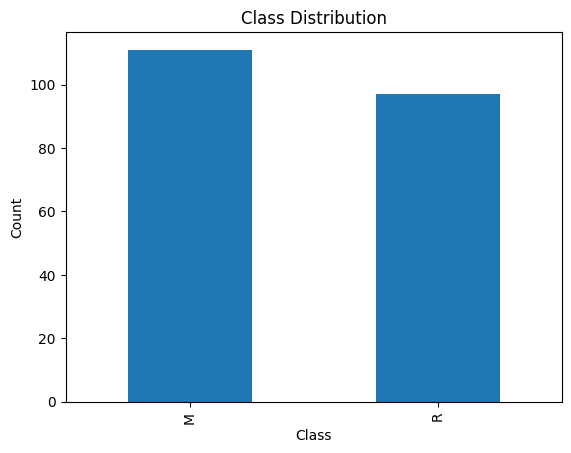

Imbalance Ratio: 1.14


In [21]:
import matplotlib.pyplot as plt
y = df['Label'].astype('category').cat.codes # M = 1 (mine), R = 0 (rock)

# Display bar plot of R vs M counts
df['Label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate imbalance ratio
class_counts = y.value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


This imbalance ratio is somewhat even. Although there is data on mines than rocks, it is not heavily skewed like an imbalance ratio of 2.0.


## Part 2  Modelling

- Perform 80 / 20 train‑test split (stratified if imbalanced).

- use StandardScaler → KNeighborsClassifier inside each fold.

- 5‑fold CV (use StratifiedKFold when imbalanced, plain KFold otherwise).

- Evaluate two models: Model  (a) KNN n_neighbors = 3 (b) KNN n_neighbors = 5

- For each model record:

i) Mean training accuracy (across folds)

ii) Mean validation accuracy

iii) Gap = train − val

- Test accuracy on the held‑out 20 % split

- Confusion matrix on the test set

- Precision, recall, F1  

Fill the required metrics into the table template below (extend it with the new columns for precision/recall/F1):

| k | Train Acc | Val Acc | Gap | Test Acc | Precision | Recall | F1 | Confusion Matrix | Best |
| :-: | :-------: | :-----: | :--: | :------: | :-------: | :----: | :---: | :--------------- | :--: |

Q1: State the best model whichever model you would deploy if the main goal is to minimise missed mines (maximise recall).

Make your judgement using the following reasong - If Based on your validation accuracy for k = 3 looked best, but the hold-out test shows k = 5 has higher balanced accuracy. Which would you deploy given that missing a mine carries greater risk than a false alarm?”


In [22]:
import sklearn.model_selection

# 80/20 train-test split
X = df.drop("Label", axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, random_state=42)

### Standard Scalar KNN
As the imbalance ratio isn't too high, I decided to use a standard scalar KNN. Had the imbalance ratio been 1.5 or greater, I would have used a stratifiedKFold instead.

In [45]:
from sklearn.model_selection import KFold  
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_knn(k):
    train_accs = []
    val_accs = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_tr_scaled, y_tr)

        train_preds = model.predict(X_tr_scaled)
        val_preds = model.predict(X_val_scaled)

        train_accs.append(accuracy_score(y_tr, train_preds))
        val_accs.append(accuracy_score(y_val, val_preds))

    mean_train_acc = np.mean(train_accs)
    mean_val_acc = np.mean(val_accs)
    gap = mean_train_acc - mean_val_acc

    # Final model on full training set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    final_model = KNeighborsClassifier(n_neighbors=k)
    final_model.fit(X_train_scaled, y_train)
    test_preds = final_model.predict(X_test_scaled)

    test_acc = accuracy_score(y_test, test_preds)
    prec = precision_score(y_test, test_preds, pos_label=1)
    rec = recall_score(y_test, test_preds, pos_label=1)
    f1 = f1_score(y_test, test_preds, pos_label=1)
    conf_mat = confusion_matrix(y_test, test_preds)

    return {
        "k": k,
        "Train Acc": round(mean_train_acc, 4),
        "Val Acc": round(mean_val_acc, 4),
        "Gap": round(gap, 4),
        "Test Acc": round(test_acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1": round(f1, 4),
        "Confusion Matrix": conf_mat,
    }

# Continue running the rest of the code as before


In [ ]:

# Run evaluations
results = [evaluate_knn(k) for k in [3, 5]]

# Display results
print(f"| k | Train Acc | Val Acc | Gap | Test Acc | Precision | Recall | F1 | Best |")
# print(f"|:-:|:----------:|:--------:|:---:|:---------:|:----------:|:------:|:----:|:------------------:|:----:|")

best_model = None
best_recall = 0

for result in results:
    is_best = ""
    if result["Recall"] > best_recall:
        best_model = result
        best_recall = result["Recall"]
        is_best = "✅"
    
    print(f"| {result['k']} | {result['Train Acc']} | {result['Val Acc']} | {result['Gap']} | {result['Test Acc']} | {result['Precision']} | {result['Recall']} | {result['F1']} | {is_best} |")
    



| k | Train Acc | Val Acc | Gap | Test Acc | Precision | Recall | F1 | Confusion Matrix | Best |
| 3 | 0.9247 | 0.795 | 0.1297 | 0.9524 | 0.8889 | 1.0 | 0.9412 | [[24, 2], [0, 16]] | ✅ |
| 5 | 0.8855 | 0.7765 | 0.1091 | 0.9048 | 0.8333 | 0.9375 | 0.8824 | [[23, 3], [1, 15]] |  |
